<a href="https://colab.research.google.com/github/a-brhian/Vibrations/blob/main/02_An%C3%A1lise_Espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformada Rápida de Fourier (FFT)

## Harmônico simples

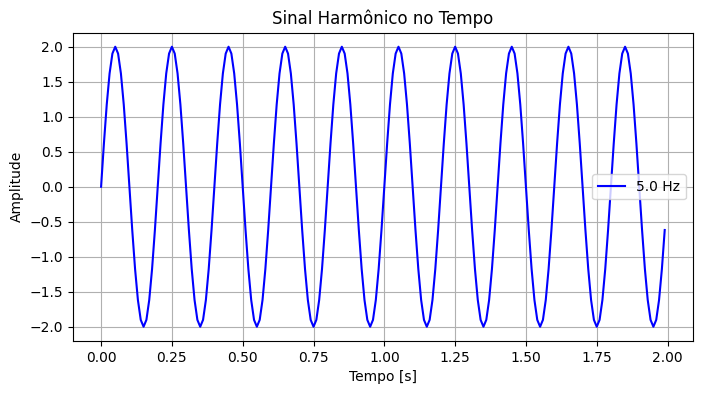

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
A = 2.0          # Amplitude
f = 5.0          # Frequência (Hz)
fs = 100.0       # Taxa de amostragem (Hz)
T = 2.0          # Duração do sinal (s)

# Vetor tempo
t = np.arange(0, T, 1/fs)

# Sinal harmônico
x = A * np.sin(2 * np.pi * f * t)

# Gráfico do sinal no tempo
plt.figure(figsize=(8, 4))
plt.plot(t, x, 'b', label=f'{f} Hz')
plt.title('Sinal Harmônico no Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


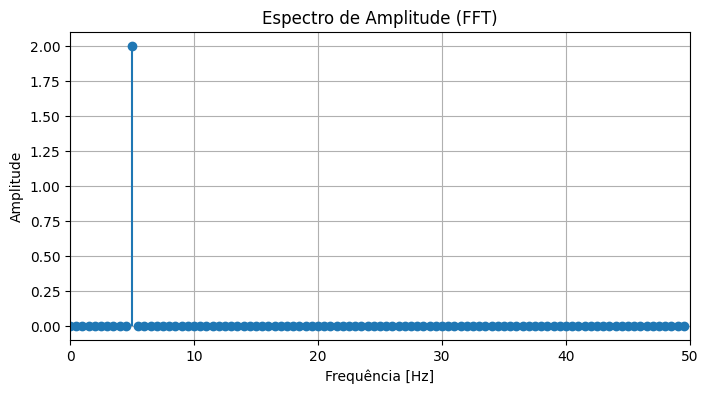

In [ ]:
# FFT
N = len(x)                   # Número de pontos
Xf = np.fft.fft(x)           # FFT do sinal
freqs = np.fft.fftfreq(N, 1/fs)  # Frequências associadas

# Apenas metade positiva do espectro
mask = freqs >= 0
freqs = freqs[mask]
Xf = Xf[mask]

# Módulo da FFT normalizado
amplitude = (2 / N) * np.abs(Xf)

# Gráfico do espectro
plt.figure(figsize=(8, 4))
plt.stem(freqs, amplitude, basefmt=" ")
plt.title('Espectro de Amplitude (FFT)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, fs/2)# ou fs/2
plt.show()

## Frequência de Nyquist

A frequência máxima que você consegue mensurar com os dados que tem é limitada pela taxa de amostragem (`fs`). Essa frequência limite é conhecida como **frequência de Nyquist**, que é metade da taxa de amostragem.

No seu código, a taxa de amostragem (`fs`) é de 100 Hz. Portanto, a frequência máxima que você consegue mensurar é a frequência de Nyquist, que é `fs / 2 = 100 / 2 = 50 Hz`.

Qualquer frequência no sinal original acima da frequência de Nyquist não será representada corretamente no espectro de frequência calculado pela FFT, um fenômeno conhecido como *aliasing*.

##Harmônicos simples + ruído gaussiano

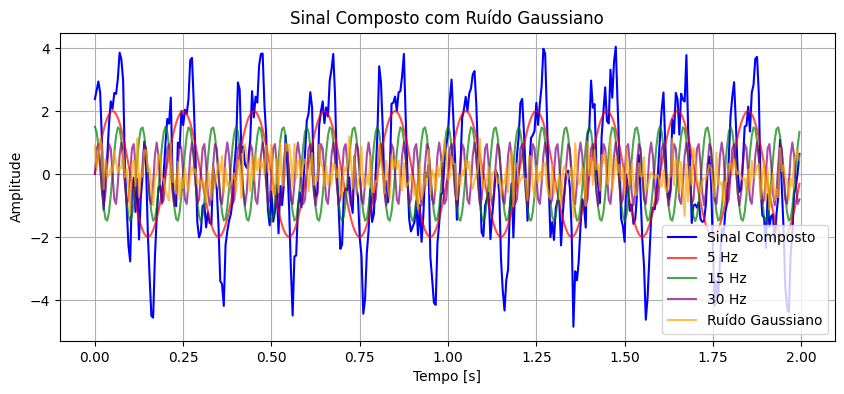

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros gerais
fs = 200.0        # taxa de amostragem (Hz)
T = 2             # duração do sinal (s)
t = np.arange(0, T, 1/fs)

# Componentes senoidais e cossenoidais
x1 = 2.0 * np.sin(2 * np.pi * 5 * t)     # 5 Hz
x2 = 1.5 * np.cos(2 * np.pi * 15 * t)    # 15 Hz
x3 = 1.0 * np.sin(2 * np.pi * 30 * t)    # 30 Hz

# Ruído gaussiano
np.random.seed(0)
noise = 0.5 * np.random.randn(len(t))

# Sinal composto
x = x1 + x2 + x3 + noise

# Plot do sinal no tempo
plt.figure(figsize=(10, 4))
plt.plot(t, x, color='b', label='Sinal Composto')
plt.plot(t, x1, color='r', label='5 Hz', alpha=0.7)
plt.plot(t, x2, color='g', label='15 Hz', alpha=0.7)
plt.plot(t, x3, color='purple', label='30 Hz', alpha=0.7)
plt.plot(t, noise, color='orange', label='Ruído Gaussiano', alpha=0.7)
plt.title('Sinal Composto com Ruído Gaussiano')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

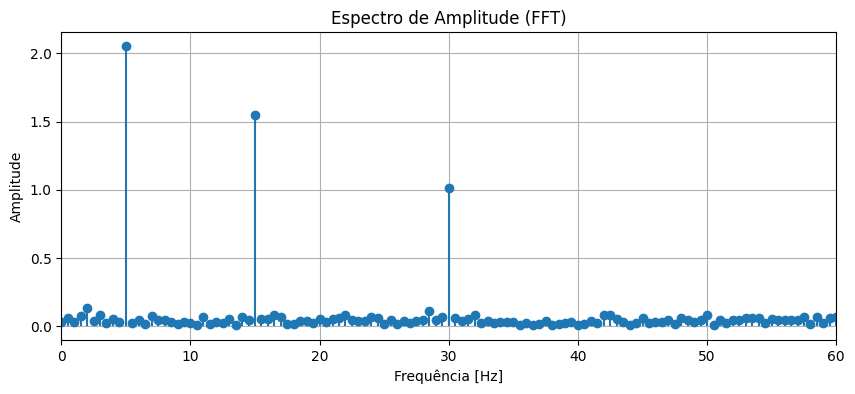

In [ ]:
# FFT
N = len(x)
Xf = np.fft.fft(x)
freqs = np.fft.fftfreq(N, 1/fs)

# Seleciona metade positiva
mask = freqs >= 0
freqs = freqs[mask]
Xf = Xf[mask]

# Amplitude normalizada
amplitude = (2/N) * np.abs(Xf)

# Gráfico do espectro
plt.figure(figsize=(10, 4))
plt.stem(freqs, amplitude, basefmt=" ")
plt.title('Espectro de Amplitude (FFT)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 60)
plt.show()


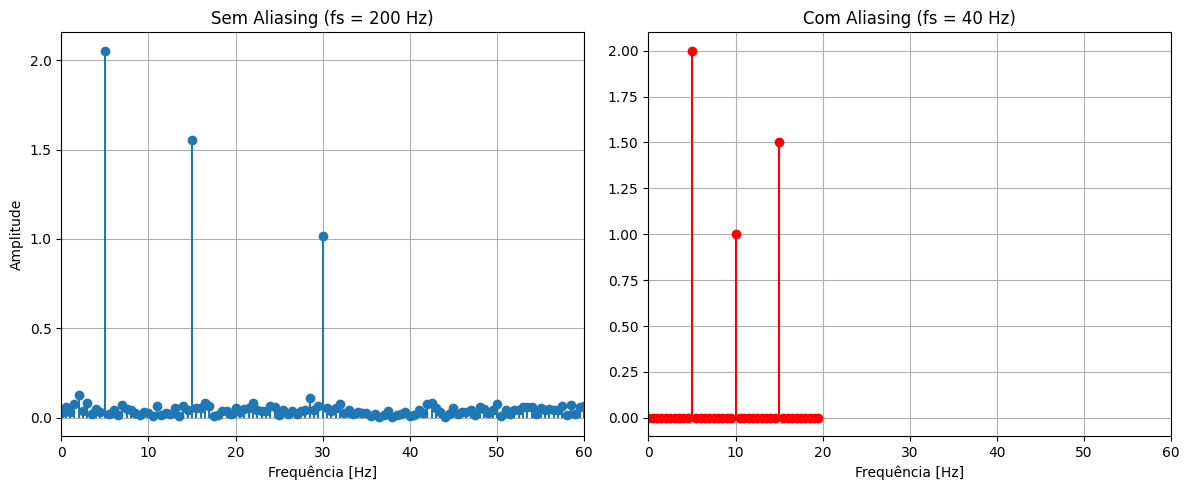

In [ ]:
# Efeito de aliasing
fs_alias = 40.0               # taxa de amostragem baixa
t_alias = np.arange(0, T, 1/fs_alias)
x_alias = 2*np.sin(2*np.pi*5*t_alias) + 1.5*np.cos(2*np.pi*15*t_alias) + 1*np.sin(2*np.pi*30*t_alias)

# FFT do sinal com aliasing
N2 = len(x_alias)
Xf_alias = np.fft.fft(x_alias)
freqs_alias = np.fft.fftfreq(N2, 1/fs_alias)

mask2 = freqs_alias >= 0
freqs_alias = freqs_alias[mask2]
Xf_alias = Xf_alias[mask2]

amplitude_alias = (2/N2) * np.abs(Xf_alias)

# Comparação lado a lado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(freqs, amplitude, basefmt=" ")
plt.title('Sem Aliasing (fs = 200 Hz)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 60)

plt.subplot(1, 2, 2)
plt.stem(freqs_alias, amplitude_alias, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title('Com Aliasing (fs = 40 Hz)')
plt.xlabel('Frequência [Hz]')
plt.grid(True)
plt.xlim(0, 60)

plt.tight_layout()
plt.show()
